In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/content/advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [20]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [8]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [10]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [13]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [14]:
df.duplicated().sum()

np.int64(0)

Visualization

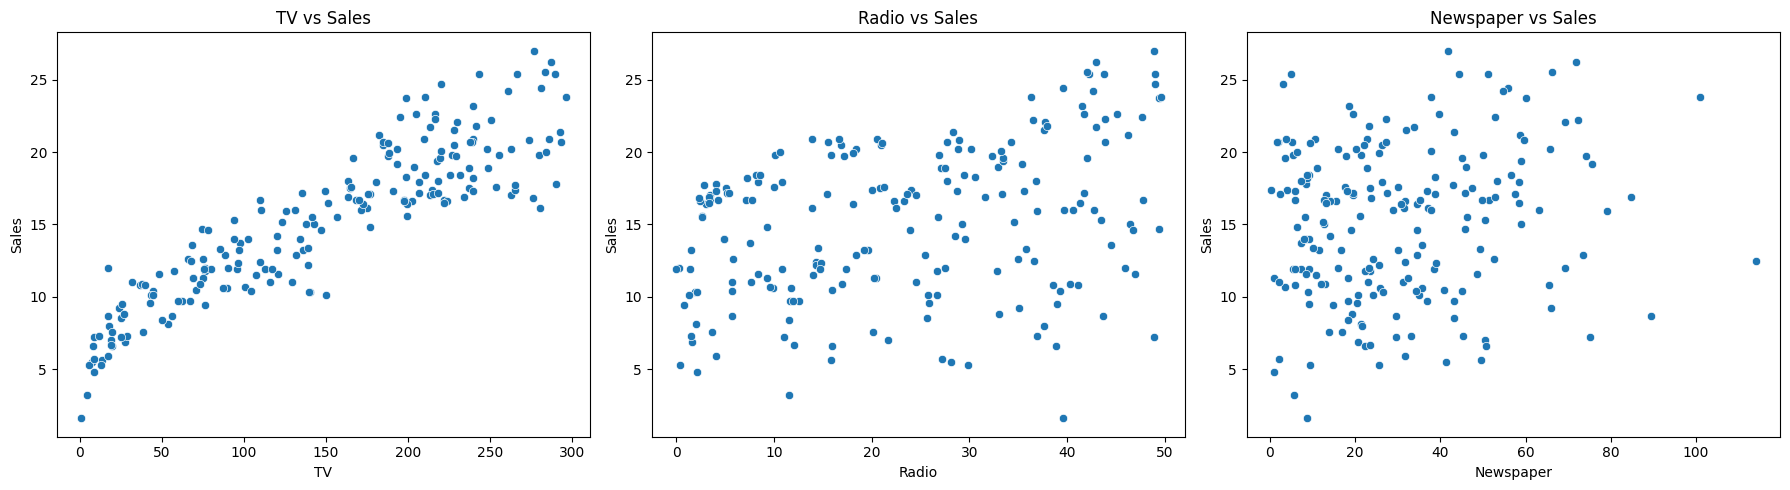

In [15]:
#distribution between each feature and sales(target)
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.scatterplot(x='TV', y='Sales', data=df, ax=axes[0])
axes[0].set_title('TV vs Sales')

sns.scatterplot(x='Radio', y='Sales', data=df, ax=axes[1])
axes[1].set_title('Radio vs Sales')

sns.scatterplot(x='Newspaper', y='Sales', data=df, ax=axes[2])
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()


TV أقوى علاقة

Radio علاقة متوسطة

Newspaper ضعيفة أو شبه معدومة

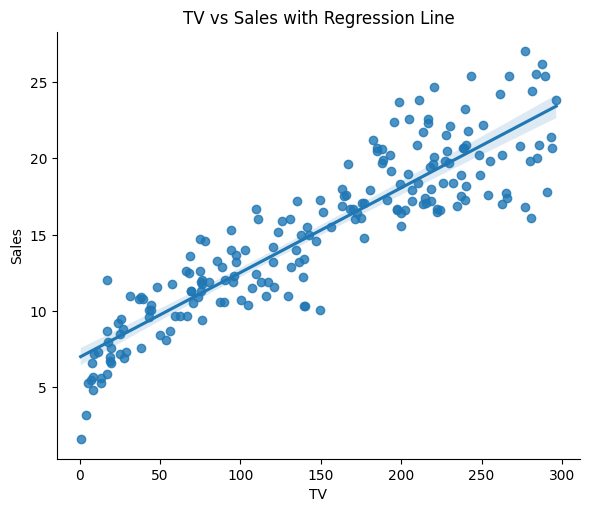

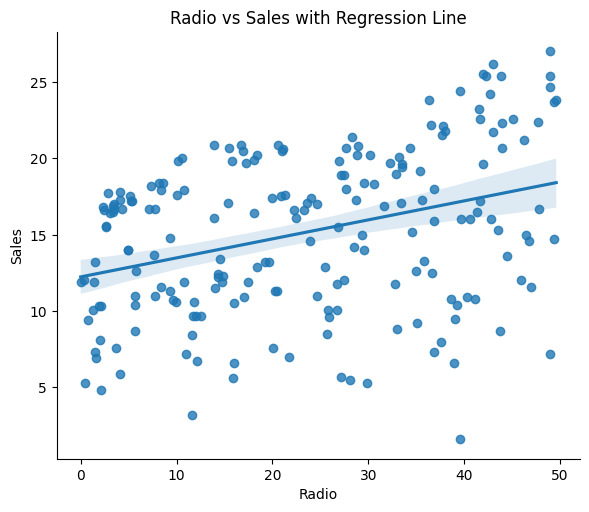

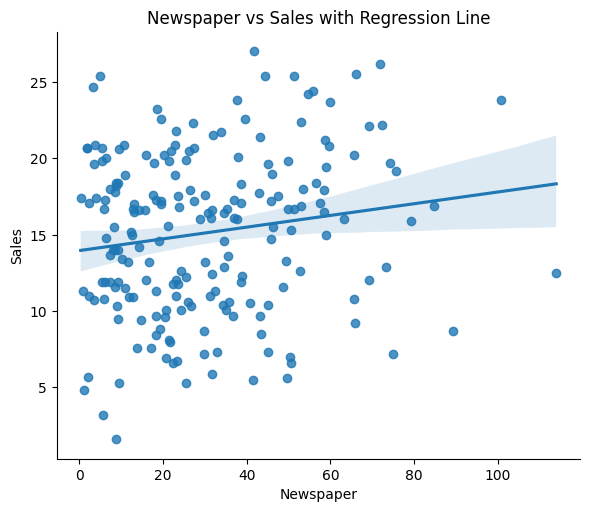

In [16]:
sns.lmplot(x='TV', y='Sales', data=df, height=5, aspect=1.2)
plt.title('TV vs Sales with Regression Line')
plt.show()
sns.lmplot(x='Radio', y='Sales', data=df, height=5, aspect=1.2)
plt.title('Radio vs Sales with Regression Line')
plt.show()

sns.lmplot(x='Newspaper', y='Sales', data=df, height=5, aspect=1.2)
plt.title('Newspaper vs Sales with Regression Line')
plt.show()



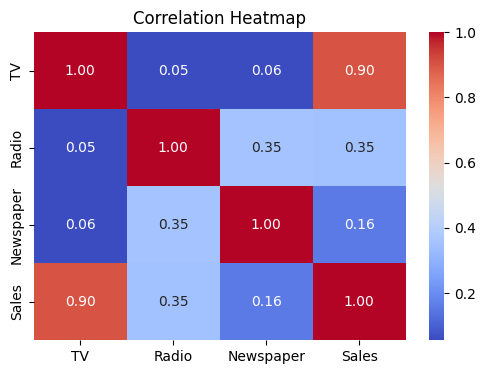

In [17]:
#correlation map
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


فهمنا منها ان اكتر حاجه بتاثر على الsales TV

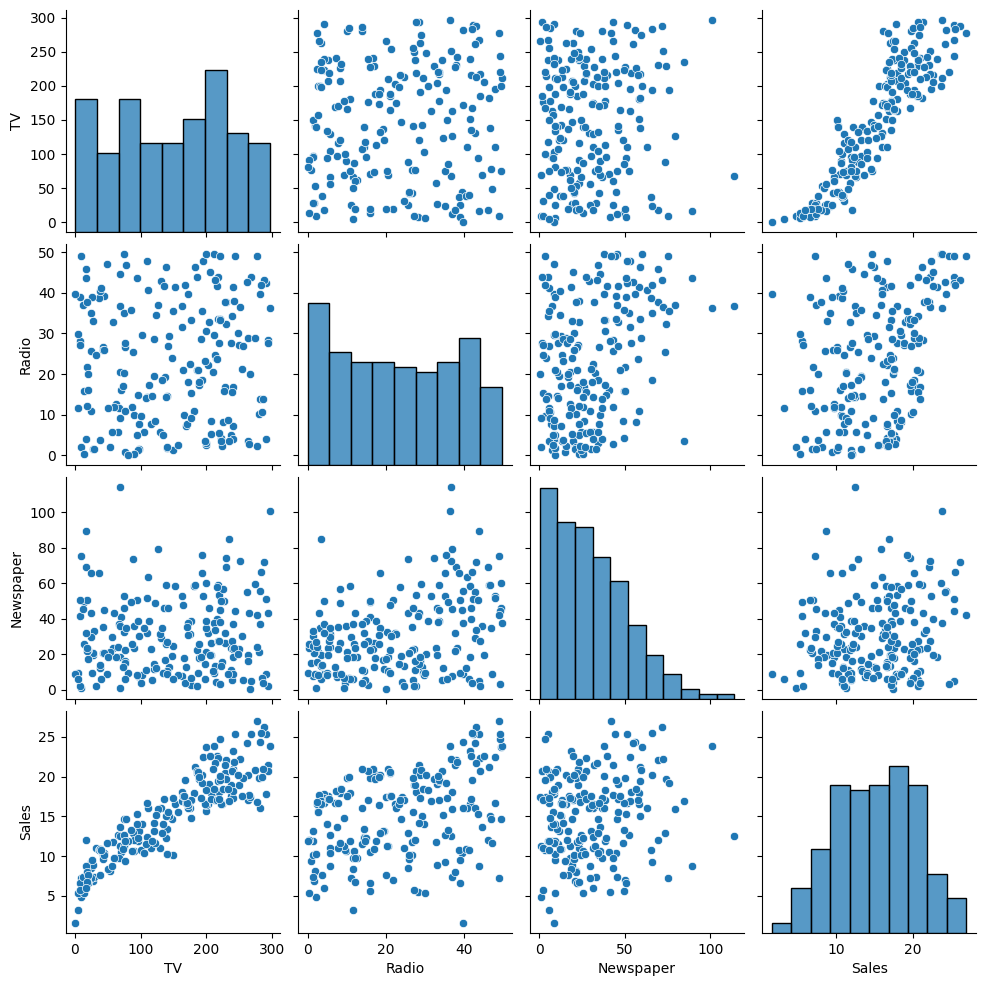

In [18]:
sns.pairplot(df)
plt.show()


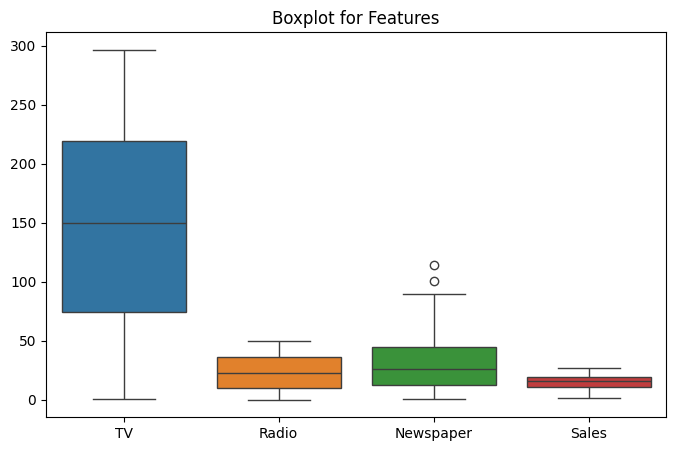

In [19]:
# TO detect outliers
plt.figure(figsize=(8,5))
sns.boxplot(data=df)
plt.title('Boxplot for Features')
plt.show()


In [21]:
X=df.drop("Sales",axis=1)
Y=df["Sales"]

In [22]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [23]:
Y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [24]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [27]:
X_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [28]:
Y_train.head()

,Sales
79,11.0
197,14.8
38,10.1
24,9.7
122,16.6


In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [30]:
model.fit(X_train,Y_train)

LinearRegression()

In [31]:
b0=model.intercept_
b1=model.coef_
print(b0)
print(b1)

4.714126402214127
[0.05450927 0.10094536 0.00433665]


In [32]:
y_predtrain=model.predict(X_train)
y_predtrain

array([11.91465765, 15.32881375,  9.91093345,  9.46132618, 17.23412363,
        7.22972412, 10.35454191, 15.23876611, 11.14036535, 11.71856758,
       13.85060866, 14.66570876, 10.44983379,  9.28550764,  9.02357336,
       12.47875166, 10.48712079, 24.99748731,  7.88523289, 15.8640533 ,
       21.30888748, 17.00814942, 12.79206695,  9.84041429, 21.01070892,
        7.48343928, 23.52204082,  7.05636619, 12.56968457, 10.08676368,
       11.1715446 ,  9.12566707, 16.92180225, 17.90167068, 15.63428805,
       18.26514616, 15.51584207, 19.23176429, 17.48701831, 21.82555114,
       10.58560762, 14.22101675, 10.75778538, 18.10690693,  9.94580615,
       17.38762989, 13.21321157, 23.7057409 , 11.04124955, 23.50498043,
        7.25377772, 19.17388849, 24.9725586 , 21.21199698, 18.85730214,
       16.49383903, 13.90044002, 11.26132856, 19.58689909, 15.32197517,
       15.91287266, 10.29394498, 20.24916557, 12.59260311, 21.37507598,
       11.62060518,  9.00761916, 19.44123849, 15.85637182, 18.57

In [33]:
y_pred=model.predict(X_test)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [34]:
mse1 = mean_squared_error(Y_train, y_predtrain)
mse1

2.676142653782669

In [35]:
mse = mean_squared_error(Y_test, y_pred)
mse

2.9077569102710896

In [36]:
r2train = r2_score(Y_train, y_predtrain)
r2train

0.9001416005862131

In [37]:
r2 = r2_score(Y_test, y_pred)
r2

0.9059011844150826